In [4]:
from sklearn.datasets import load_iris
import pandas as pd

In [5]:
iris=load_iris()
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:ylabel='target'>

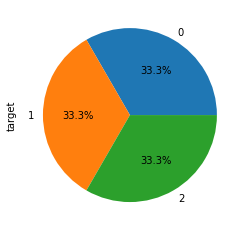

In [7]:
df.target.value_counts().plot.pie(autopct='%.1f%%')

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import  plotly.express as px

In [9]:
X= df.iloc[:,:-1]   #[: ,0:-1]
y = df.target

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1)
clf1=GaussianNB()
clf2=KNeighborsClassifier()
clf1.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)
ypred1=clf1.predict(X)
ypred2=clf2.predict(X)
print('confusion matics clf1')
print(confusion_matrix(y,ypred1))
print('classifaction report clf2')
print(classification_report(y,ypred1))
print('-'*25)
print('confusion matrics clf2')
print(confusion_matrix(y,ypred2))
print(classification_report(y,ypred2))


confusion matics clf1
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]
classifaction report clf2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

-------------------------
confusion matrics clf2
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



social networking  app

In [11]:
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:ylabel='Purchased'>

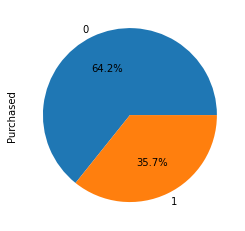

In [13]:
df.Purchased.value_counts().plot.pie(autopct='%.1f%%')

In [16]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [19]:
from imblearn.over_sampling import SMOTE,SMOTEN,SVMSMOTE

In [20]:
sm = [SMOTE(),SMOTEN(),SVMSMOTE()]
X1,y1 = sm[0].fit_resample(X,y)
X2,y2 = sm[1].fit_resample(X,y)
X3,y3 = sm[2].fit_resample(X,y)

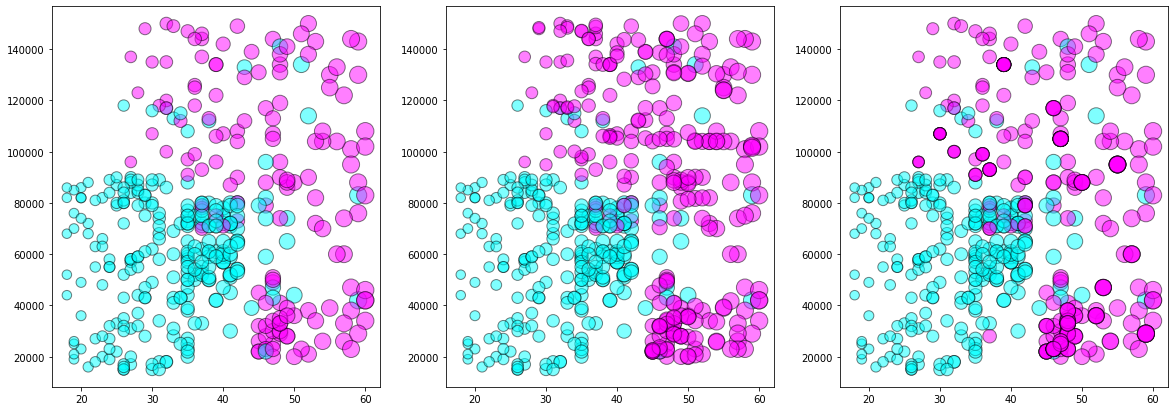

In [21]:
fig, ax = plt.subplots(1,3,figsize=(20,7))
ax[0].scatter(X.Age,X.EstimatedSalary,c=y,s=X.Age*5,cmap='cool',edgecolor='black',alpha=.5)
ax[1].scatter(X1.Age,X1.EstimatedSalary,c=y1,s=X1.Age*5,cmap='cool',edgecolor='black',alpha=.5)
ax[2].scatter(X2.Age,X2.EstimatedSalary,c=y2,s=X2.Age*5,cmap='cool',edgecolor='black',alpha=.5)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [23]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,random_state=1234)
m = LogisticRegression()
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[46  7]
 [ 6 21]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        53
           1       0.75      0.78      0.76        27

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



In [24]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X1)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y1,test_size=.2,random_state=1234)
m = LogisticRegression()
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[37 10]
 [ 7 49]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        47
           1       0.83      0.88      0.85        56

    accuracy                           0.83       103
   macro avg       0.84      0.83      0.83       103
weighted avg       0.84      0.83      0.83       103



In [25]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X2)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y2,test_size=.2,random_state=1234)
m = LogisticRegression()
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[37 10]
 [ 6 50]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        47
           1       0.83      0.89      0.86        56

    accuracy                           0.84       103
   macro avg       0.85      0.84      0.84       103
weighted avg       0.85      0.84      0.84       103



In [27]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X3)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y3,test_size=.2,random_state=1234)
m = LogisticRegression()
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[37 10]
 [ 8 48]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        47
           1       0.83      0.86      0.84        56

    accuracy                           0.83       103
   macro avg       0.82      0.82      0.82       103
weighted avg       0.83      0.83      0.82       103



In [28]:
from sklearn.pipeline import Pipeline
p = Pipeline([('scaler',StandardScaler()),('model',RandomForestClassifier(n_estimators=400))])
p.fit(xtrain,ytrain)
ypred = p.predict(xtest)    
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[37 10]
 [ 7 49]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        47
           1       0.83      0.88      0.85        56

    accuracy                           0.83       103
   macro avg       0.84      0.83      0.83       103
weighted avg       0.84      0.83      0.83       103



In [29]:
from joblib import dump

In [30]:
model_dict={
    'title':'classification model for ad click prediction',
    'classifier':m,
    'scaler':scaler,
}

dump(model_dict, "clf_ap.pkl")

['clf_ap.pkl']